# Даниелян А.А. ИУ5-64б
## Вариант 4: задача 1, набор данных 4

In [10]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data = pd.read_csv('./heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
# типы колонок
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Категориальных признаков нет

In [13]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Пропусков в данных нет

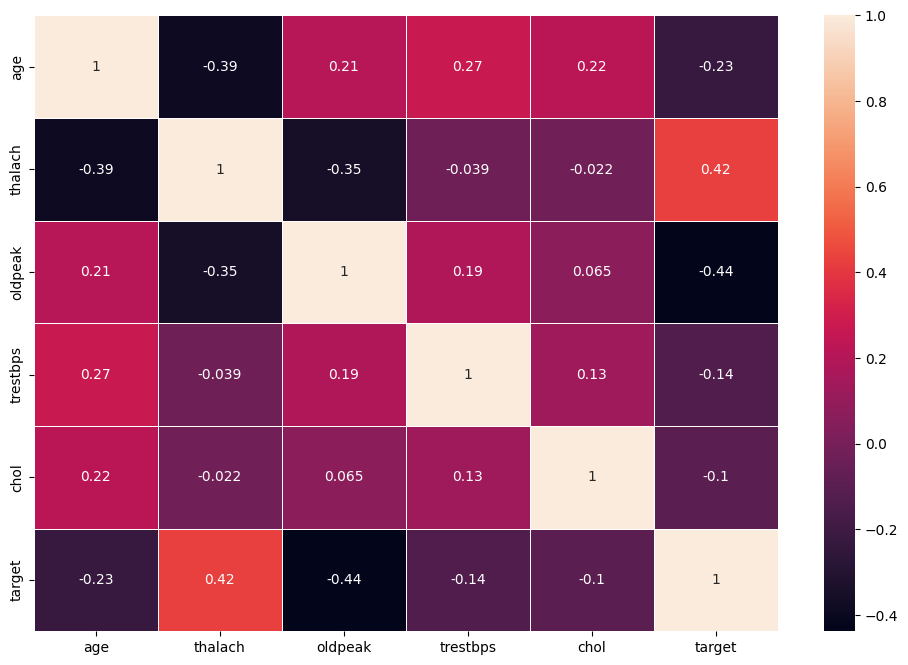

In [14]:
cols=[ 'age','thalach','oldpeak', 'trestbps','chol', 'target' ]
correlation_matrix = data[cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True,  linewidths=.5)
plt.show()

# Вывод
Для построения моделей машинного обучения стоит исключить признаки, которые слишком слабо кореллируют с целевым: ** **Текст, выделенный полужирным шрифтом**chol**(serum cholestoral in mg/dl) и **trestbps** (resting blood pressure in mm Hg)
Следовательно можно использовать для построения модели машинного обучения следующие признаки: **age** (age in years),** thalach** (maximum heart rate achieved), **oldpeak** (ST depression induced by exercise relative to res).